In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 10)
addArchRGenome("mm10")

Setting default number of Parallel threads to 10.

Setting default genome to Mm10.



In [3]:
PROJDIR='../../../data/raw_data/mm10/BICCN_mouse_caudoputamen'
ARCHDIR=file.path(PROJDIR,'ArchR_BICCN_CP')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

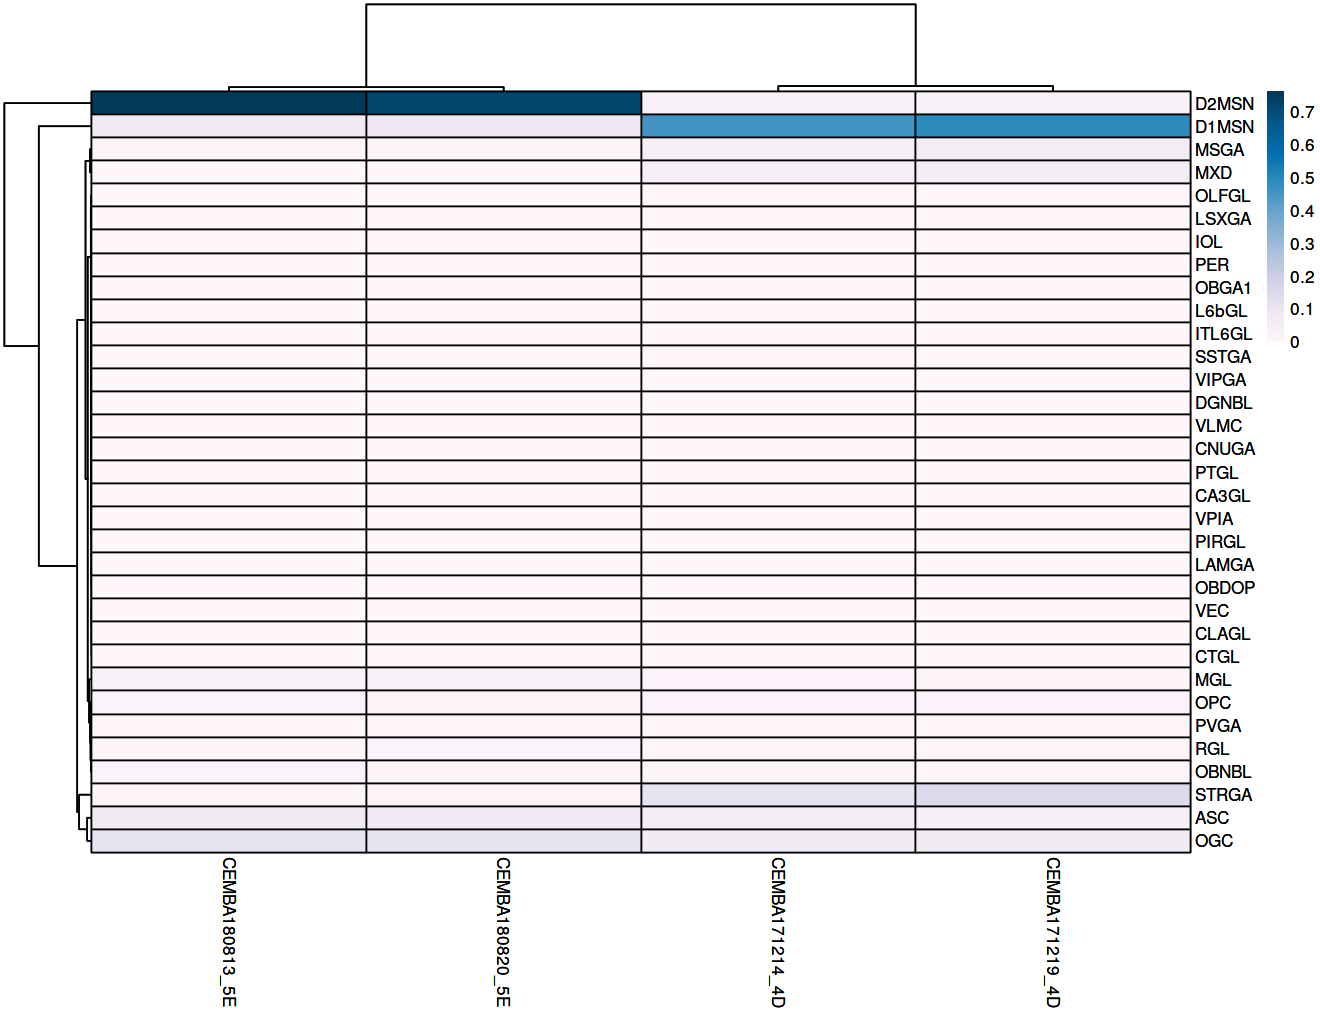

In [4]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$L2cluster), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f3c4b542a-Date-2021-01-22_Time-09-39-20.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f3c4b542a-Date-2021-01-22_Time-09-39-20.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f625b2283-Date-2021-01-22_Time-09-39-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f625b2283-Date-2021-01-22_Time-09-39-27.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f46ece199-Date-2021-01-22_Time-09-39-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : Arch

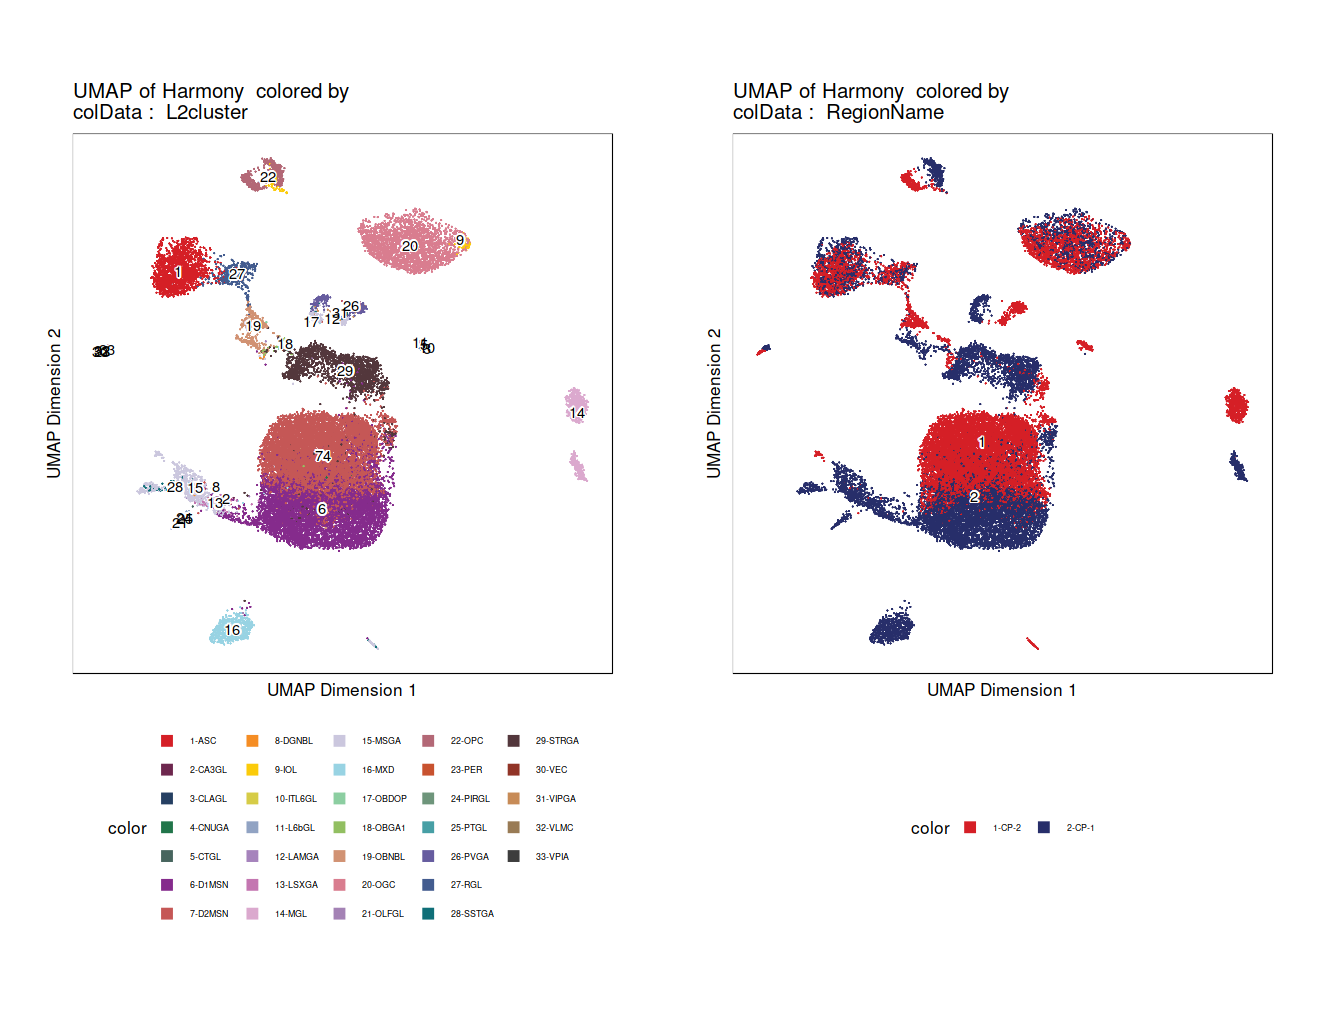

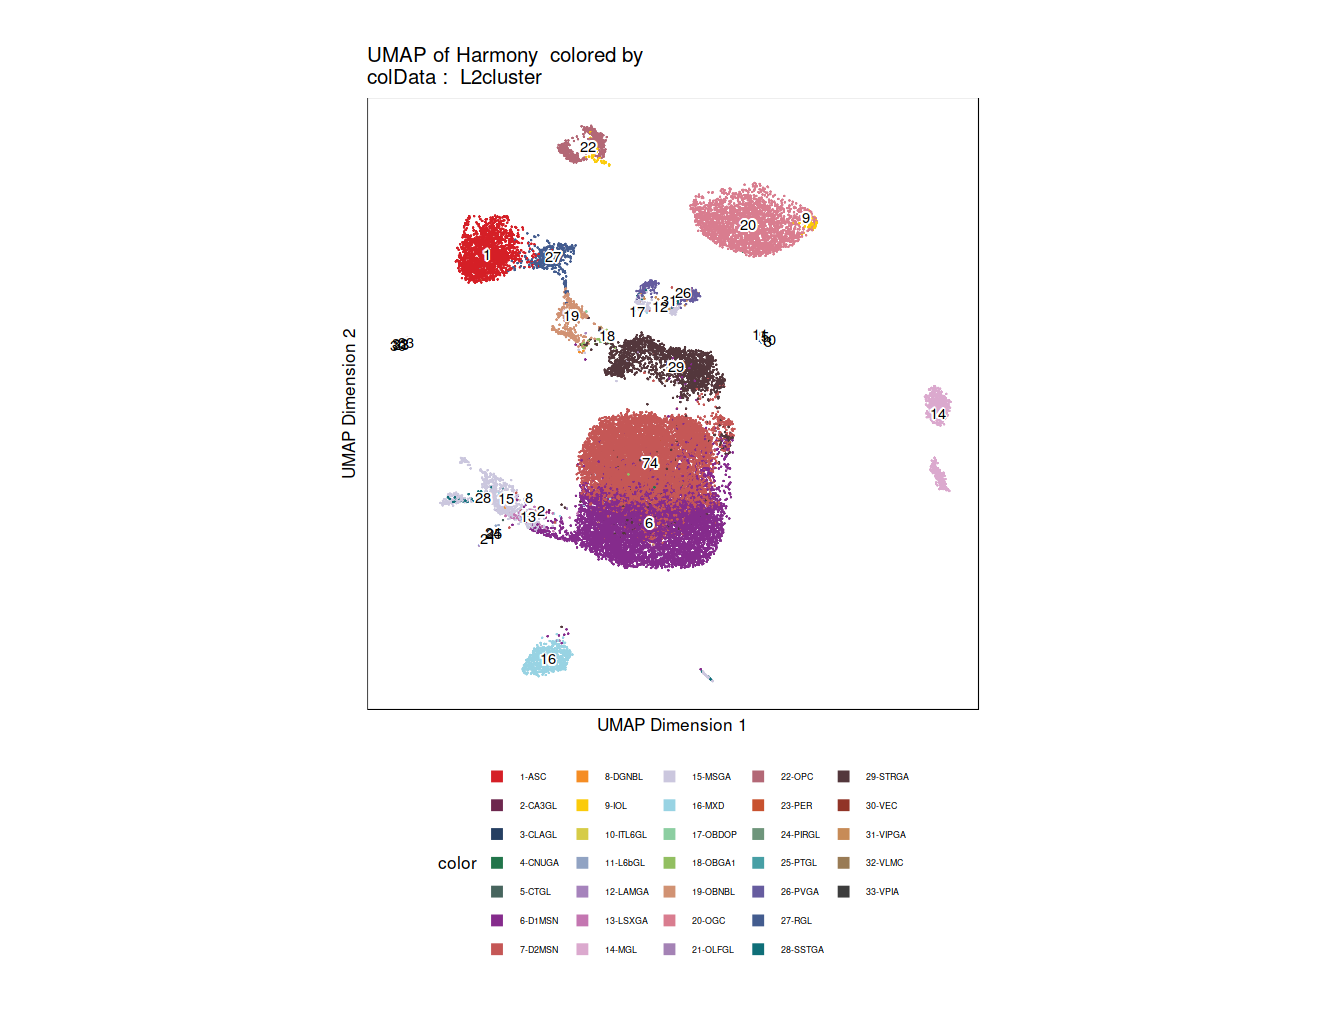

In [5]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "L2cluster", embedding = "UMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "RegionName", embedding = "UMAP")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "UMAP")
ggAlignPlots(p1, p2, type = "h")
p1

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f369a0933-Date-2021-01-22_Time-09-39-40.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-22 09:39:40 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f369a0933-Date-2021-01-22_Time-09-39-40.log



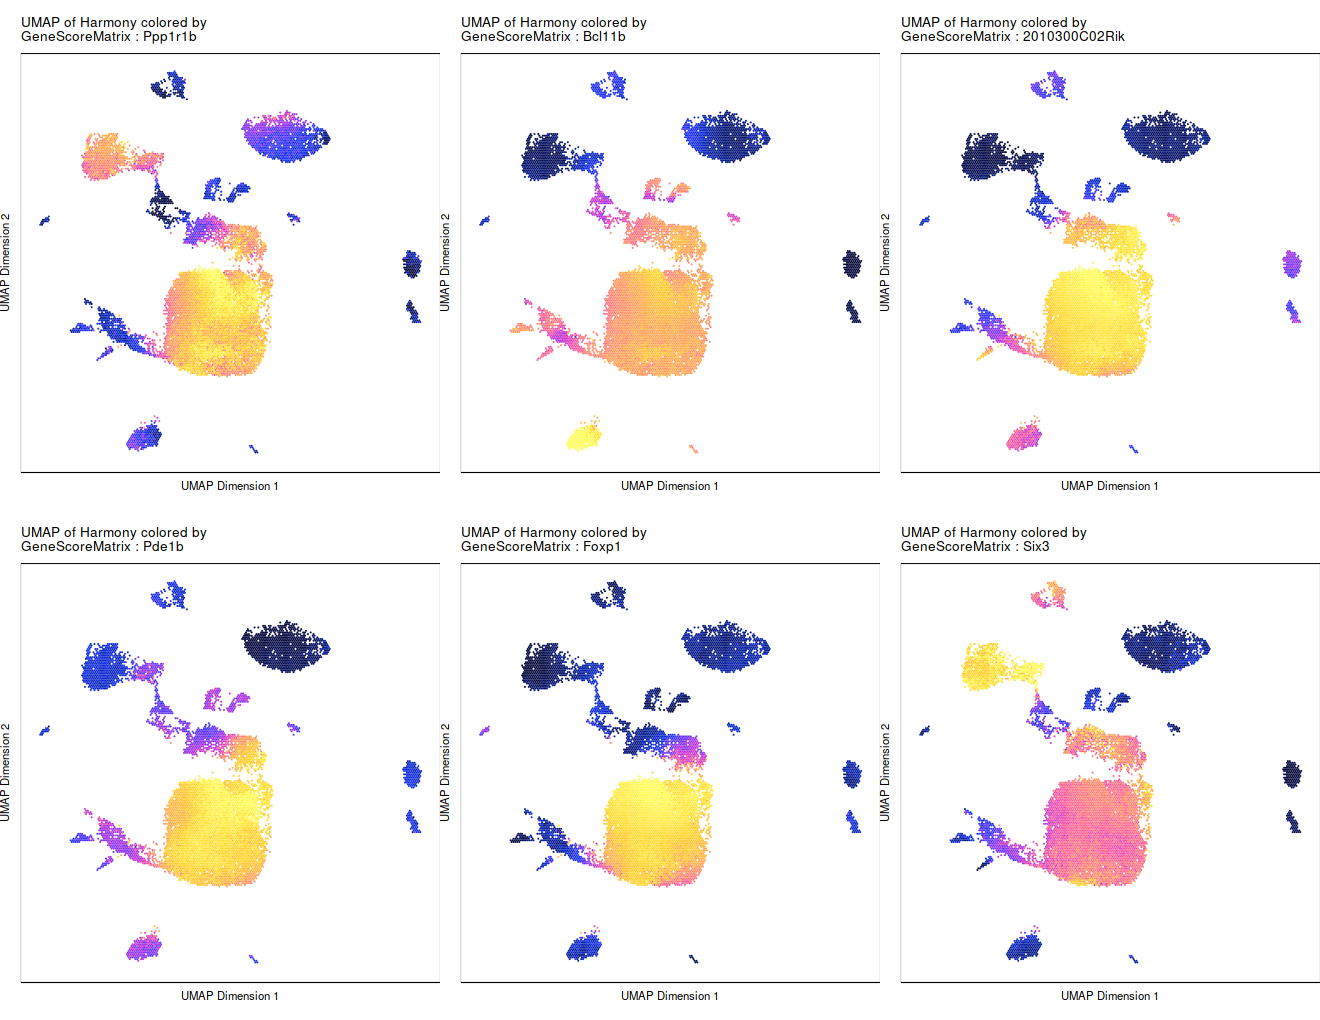

In [6]:
# Broad MSN marker, mouse 2010300C02Rik == human KIAA1211L
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Ppp1r1b','Bcl11b','2010300C02Rik','Pde1b','Foxp1','Six3' )
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAP") #, imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f6bb5d615-Date-2021-01-22_Time-09-40-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-22 09:40:34 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f6bb5d615-Date-2021-01-22_Time-09-40-34.log



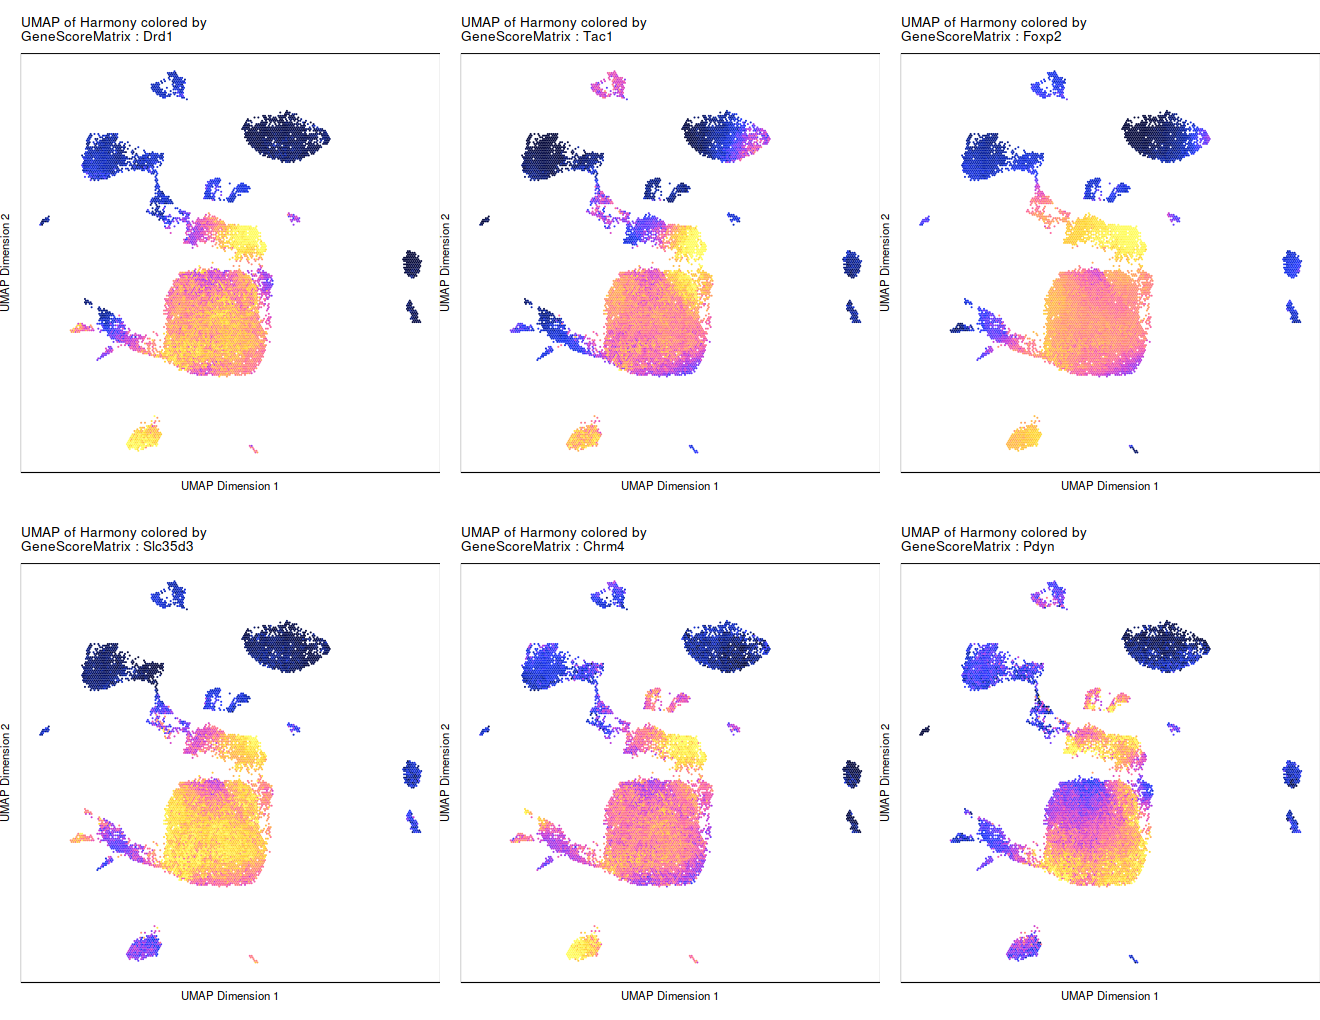

In [7]:
markMSN1 = c('Drd1','Tac1','Foxp2','Slc35d3','Chrm4', 'Pdyn') # D1 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAP") #, imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f22cf94a2-Date-2021-01-22_Time-09-41-00.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-22 09:41:01 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f22cf94a2-Date-2021-01-22_Time-09-41-00.log



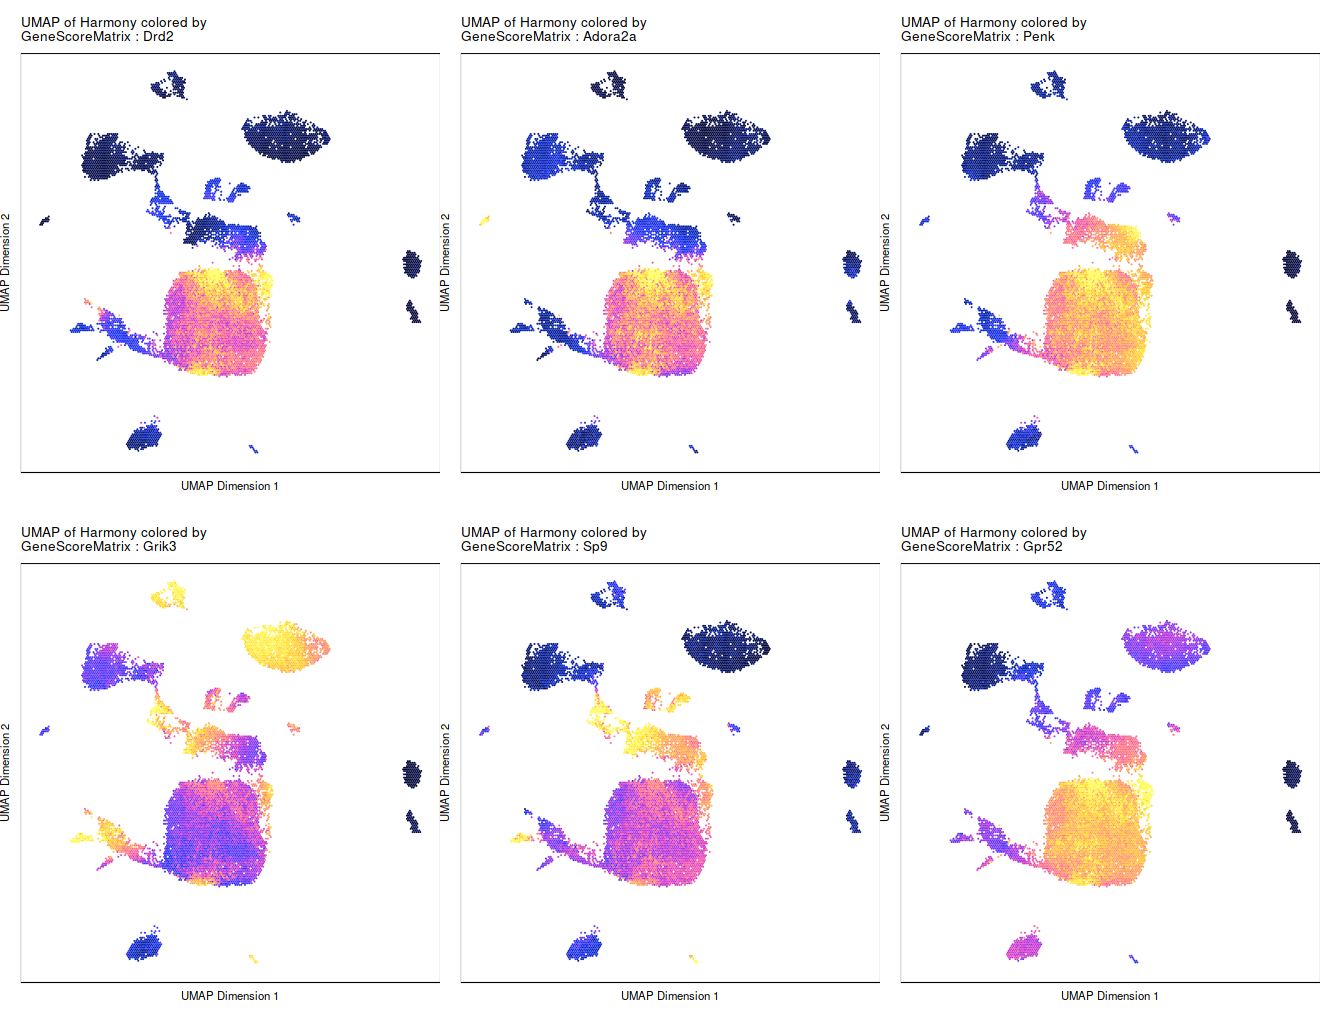

In [8]:
markMSN2 = c('Drd2','Adora2a','Penk', 'Grik3', 'Sp9', 'Gpr52')# D2 markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAP") #, imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f43bde249-Date-2021-01-22_Time-09-41-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-22 09:41:29 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f43bde249-Date-2021-01-22_Time-09-41-28.log



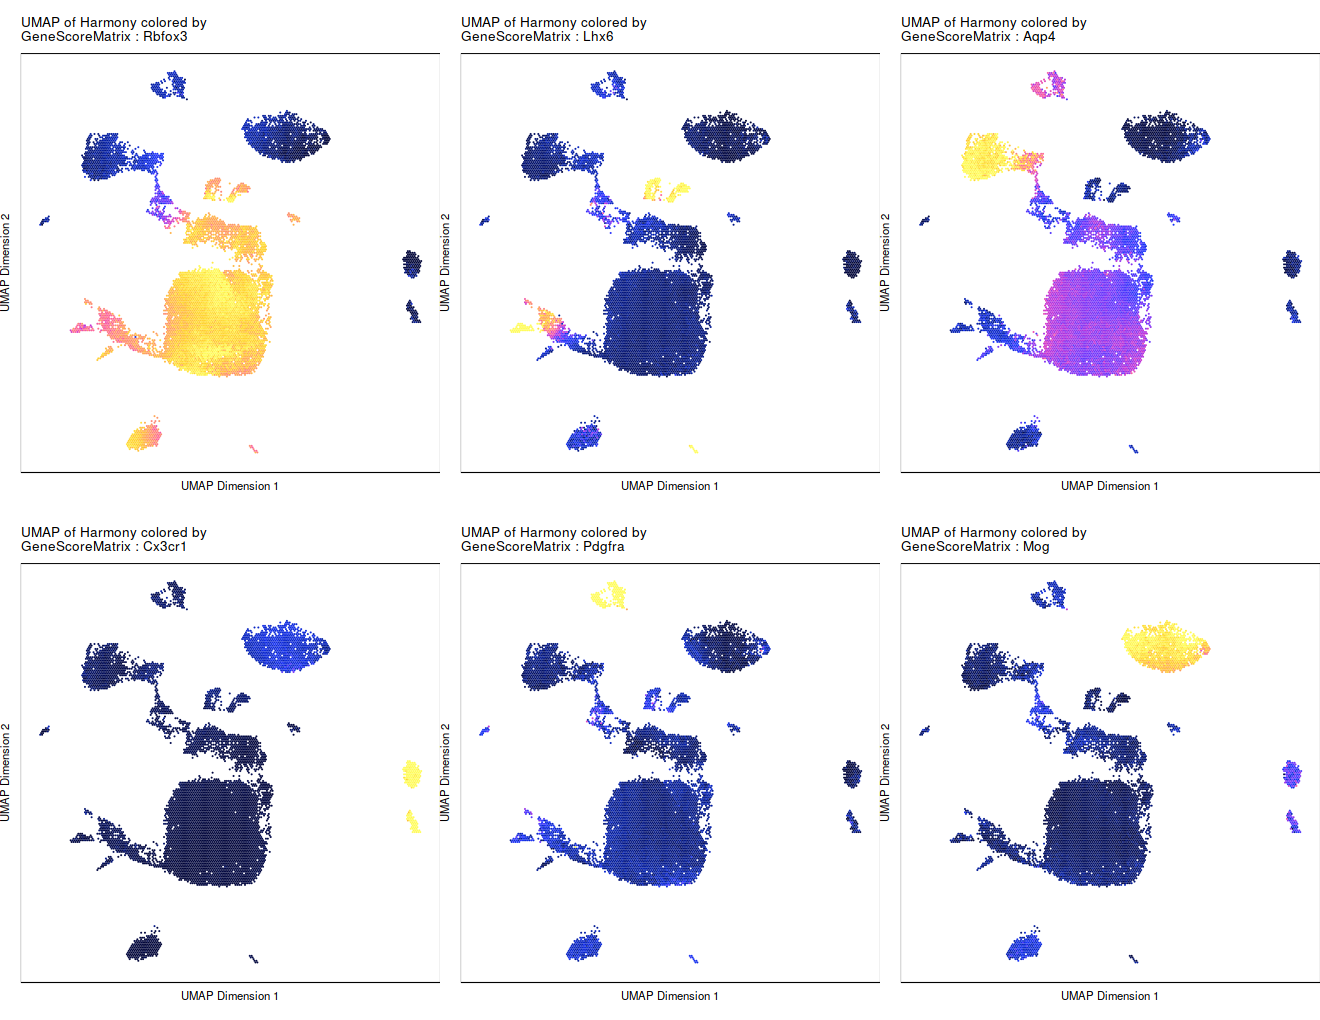

In [9]:
## Neuron vs. Glia markers
markerGenes1  <- c('Rbfox3', # Neuron
                   'Lhx6', #Interneuron
                   'Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog' # Oligo
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAP") #, imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f443b403e-Date-2021-01-22_Time-09-49-36.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-01-22 09:49:37 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f443b403e-Date-2021-01-22_Time-09-49-36.log



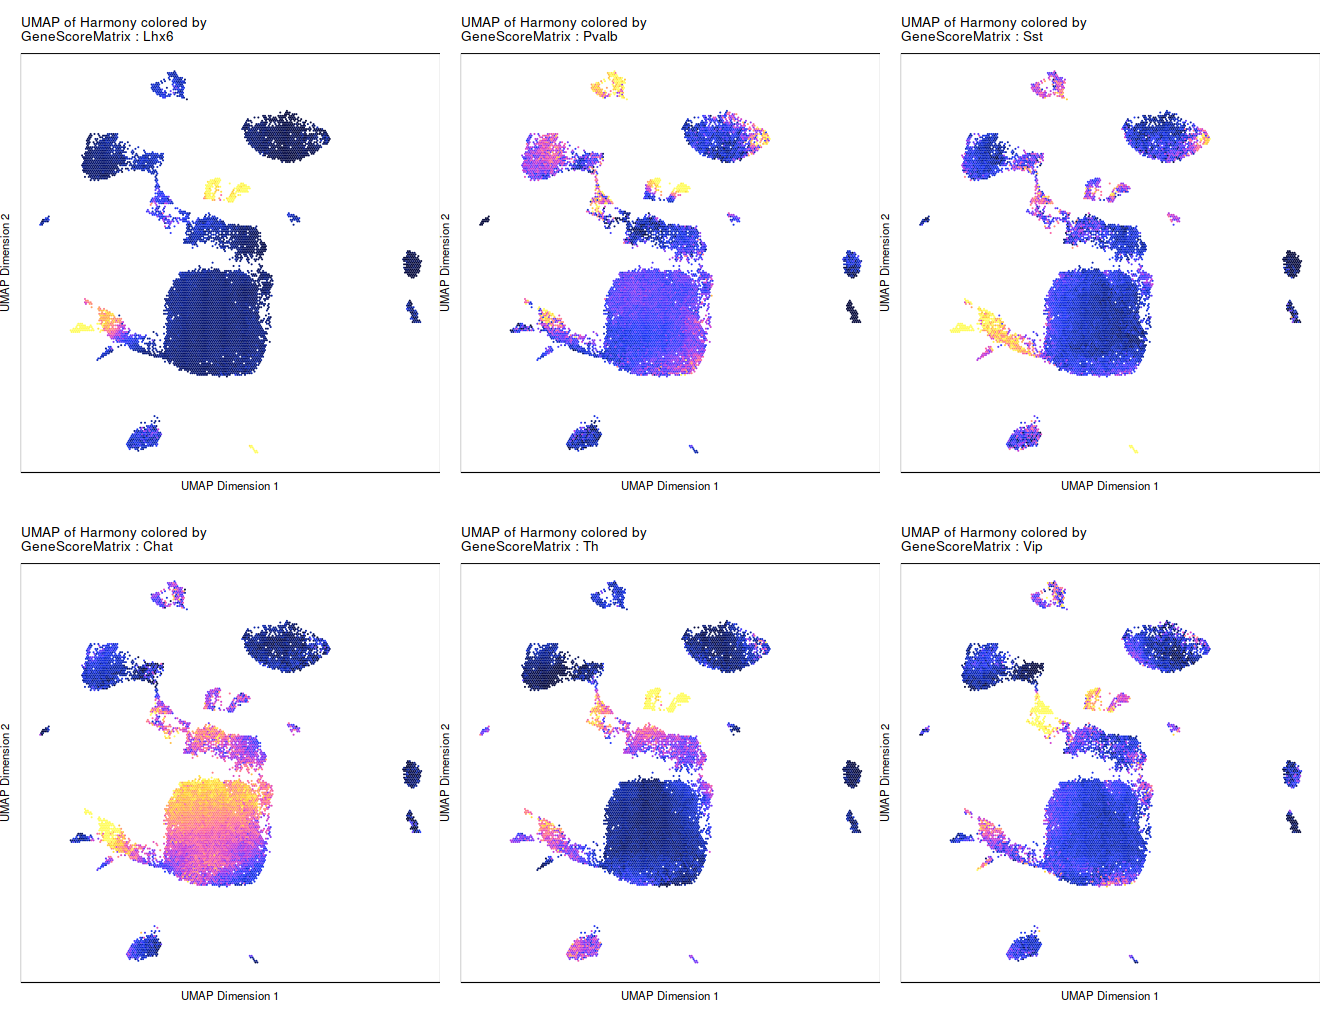

In [12]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'Sst', 'Chat','Th', 'Vip') # Interneuron markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix",
                    name = markerGenes1, embedding = "UMAP") #, imputeWeights = NULL)
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

# Relabel cluster and call peaks

In [14]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
    'CNUGA' = 'Drop',
    'CTGL' = 'Drop',
    'CA3GL' = 'Drop',
    'CLAGL' = 'Drop',
    'DGNBL'  = 'Drop',
    'IOL' = 'Drop',
    'ITL6GL' = 'Drop',
    'L6bGL' = 'Drop',
    'LSXGA'  = 'Drop', 
    'PIRGL'= 'Drop',
    'PTGL' = 'Drop',
    'OBDOP' = 'Drop',
    'OBGA1' = 'Drop',
#     'OBGL' = 'Drop',
    'OBNBL'  = 'Drop',
    'OLFGL'  = 'Drop',
    'VPIA'= 'Drop',
    'MSGA'  = 'Drop',
    'PER' = 'Drop',
    'VEC' = 'Drop',
    'VLMC' = 'Drop',    
    'SSTGA' = 'Drop',
    'VIPGA' = 'Drop',
    'LAMGA'= 'Drop',
    'RGL' = 'Drop',
    'STRGA'  = 'Drop',

    'D1MSN' = 'MSN_D1',
    'D2MSN' = 'MSN_D2',
    'MXD' = 'MSN_SN',
    'PVGA'  = 'INT_Pvalb',
    
    'ASC' = 'Astro',
    'OPC'  = 'OPC',
    'OGC' = 'Oligo',
    'MGL' = 'Microglia')
proj$Clusters2 <- mapLabels(proj$L2cluster, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Clusters2)


    Astro      Drop INT_Pvalb Microglia    MSN_D1    MSN_D2    MSN_SN     Oligo 
     1648      4287       268       645      6974      9466       637      2453 
      OPC 
      505 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1f5f8d74883-Date-2021-01-22_Time-09-51-12.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1f5f8d74883-Date-2021-01-22_Time-09-51-12.log



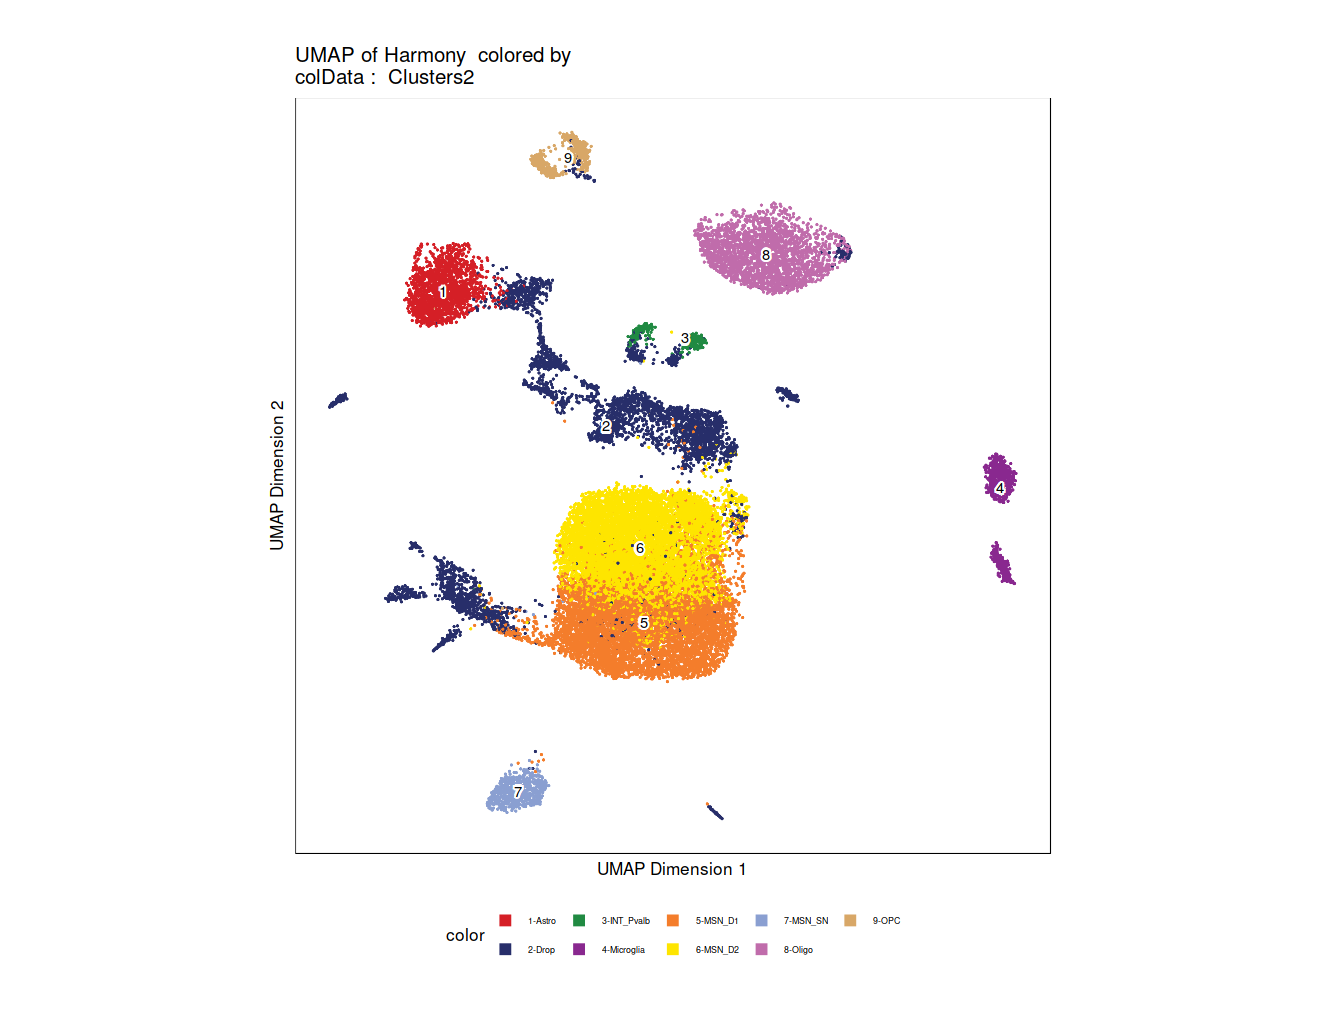

In [15]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters2", embedding = "UMAP")
p1

In [17]:
# drop the drop clusters
ARCHDIR2=file.path(PROJDIR,'ArchR_BICCN_CP_labeled')
idxSample <- BiocGenerics::which(proj$Clusters2 %ni% "Drop")
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force =T
)

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/machineLearningForComputationalBiology/snATAC_cross_species_caudate/data/raw_data/mm10/BICCN_mouse_caudoputamen/ArchR_BICCN_CP_labeled

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
               

In [18]:
# make group coverage, call peaks, and 
proj2<-addGroupCoverages(proj2, groupBy="Clusters2", force = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-1f5f3e9d752-Date-2021-01-22_Time-09-57-44.log
If there is an issue, please report to github with logFile!

Astro (1 of 8) : CellGroups N = 4

INT_Pvalb (2 of 8) : CellGroups N = 4

Microglia (3 of 8) : CellGroups N = 4

MSN_D1 (4 of 8) : CellGroups N = 4

MSN_D2 (5 of 8) : CellGroups N = 4

MSN_SN (6 of 8) : CellGroups N = 2

Oligo (7 of 8) : CellGroups N = 4

OPC (8 of 8) : CellGroups N = 4

2021-01-22 09:57:46 : Creating Coverage Files!, 0.033 mins elapsed.

2021-01-22 09:57:46 : Batch Execution w/ safelapply!, 0.033 mins elapsed.

2021-01-22 10:07:26 : Adding Kmer Bias to Coverage Files!, 9.699 mins elapsed.

Completed Kmer Bias Calculation

Adding Kmer Bias (1 of 30)

Adding Kmer Bias (2 of 30)

Adding Kmer Bias (3 of 30)

Adding Kmer Bias (4 of 30)

Adding Kmer Bias (5 of 30)

Adding Kmer Bias (6 of 30)

Adding Kmer Bias (7 of 30)

Adding Kmer Bias (8 of 30)

Adding Kmer Bias (9 of 30)

Adding Kmer Bias (10 of 30)

Adding Kmer B

In [19]:
# call peaks 
proj2<-addReproduciblePeakSet(proj2, groupBy = "Clusters2", plot = FALSE)
proj2 = saveArchRProject(ArchRProj = proj2)

Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-1f5f7e67acac-Date-2021-01-22_Time-10-17-48.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2021-01-22 10:17:48 : Peak Calling Parameters!, 0.005 mins elapsed.



              Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
Astro         Astro   1648       1595           4  312  500   150000
INT_Pvalb INT_Pvalb    268        268           4   58   77   134000
Microglia Microglia    645        645           4  101  250   150000
MSN_D1       MSN_D1   6974       2000           4  500  500   150000
MSN_D2       MSN_D2   9466       1468           4  223  500   150000
MSN_SN       MSN_SN    637        637           2  316  321   150000
Oligo         Oligo   2453       1830           4  399  500   150000
OPC             OPC    505        505           4   92  143   150000


2021-01-22 10:17:48 : Batching Peak Calls!, 0.005 mins elapsed.

2021-01-22 10:17:48 : Batch Execution w/ safelapply!, 0 mins elapsed.

2021-01-22 10:48:34 : Identifying Reproducible Peaks!, 30.772 mins elapsed.

2021-01-22 10:49:39 : Creating Union Peak Set!, 31.859 mins elapsed.

Converged after 5 iterations!

2021-01-22 10:49:45 : Finished Creating Union Peak Set (224763)!, 31.96 mins elapsed.

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                

In [20]:
# add peak counts matrix 
proj2 <- addPeakMatrix(proj2)
proj2 = saveArchRProject(ArchRProj = proj2)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-1f5f2f1905b6-Date-2021-01-22_Time-10-50-00.log
If there is an issue, please report to github with logFile!

2021-01-22 10:50:00 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-1f5f2f1905b6-Date-2021-01-22_Time-10-50-00.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||


In [21]:
# add motif enrichment matrix
proj2 <- addMotifAnnotations(ArchRProj = proj2, motifSet = "cisbp", name = "Motif")
proj2 = saveArchRProject(ArchRProj = proj2)

No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-1f5f5d7f649a-Date-2021-01-22_Time-10-53-44.log
If there is an issue, please report to github with logFile!

2021-01-22 10:53:50 : Gettting Motif Set, Species : Mus musculus, 0.004 mins elapsed.

Using version 2 motifs!

2021-01-22 10:53:53 : Finding Motif Positions with motifmatchr!, 0.058 mins elapsed.

2021-01-22 10:58:14 : Creating Motif Overlap Matrix, 4.41 mins elapsed.

2021-01-22 10:58:20 : Finished Getting Motif Info!, 4.501 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-1f5f5d7f649a-Date-2021-01-22_Time-10-53-44.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                          

In [22]:
# add motif deviations matrix
proj2 <- addBgdPeaks(proj2)
proj2 <- addDeviationsMatrix(proj2,  peakAnnotation = "Motif", force = TRUE)
proj2 = saveArchRProject(ArchRProj = proj2)

Identifying Background Peaks!

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-1f5f6c0bd04f-Date-2021-01-22_Time-10-59-11.log
If there is an issue, please report to github with logFile!



NULL


2021-01-22 10:59:17 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2021-01-22 12:12:28 : Completed Computing Deviations!, 73.283 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-1f5f6c0bd04f-Date-2021-01-22_Time-10-59-11.log

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__               

In [23]:
# add co-accessibility matrix
proj2 <- addCoAccessibility(proj2, reducedDims = "Harmony", dimsToUse = 1:30,
                           scaleDims = TRUE, corCutOff = 0.75, k = 100, 
                           knnIteration = 500, overlapCutoff = 0.8, 
                           maxDist = 1e+05, scaleTo = 10^4, log2Norm = TRUE)

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-1f5f1e1b1c02-Date-2021-01-22_Time-12-12-44.log
If there is an issue, please report to github with logFile!

2021-01-22 12:12:44 : Computing KNN, 0.006 mins elapsed.

2021-01-22 12:12:44 : Identifying Non-Overlapping KNN pairs, 0.013 mins elapsed.

2021-01-22 12:12:47 : Identified 495 Groupings!, 0.061 mins elapsed.

2021-01-22 12:12:55 : Computing Co-Accessibility chr1 (1 of 20), 0.192 mins elapsed.

2021-01-22 12:13:05 : Computing Co-Accessibility chr2 (2 of 20), 0.361 mins elapsed.

2021-01-22 12:13:14 : Computing Co-Accessibility chr3 (3 of 20), 0.512 mins elapsed.

2021-01-22 12:13:23 : Computing Co-Accessibility chr4 (4 of 20), 0.655 mins elapsed.

2021-01-22 12:13:31 : Computing Co-Accessibility chr5 (5 of 20), 0.79 mins elapsed.

2021-01-22 12:13:39 : Computing Co-Accessibility chr6 (6 of 20), 0.929 mins elapsed.

2021-01-22 12:13:48 : Computing Co-Accessibility chr7 (7 of 20), 1.071 mins elapsed.

2021-01-22 12:13:55 : Compu

In [24]:
proj2 = saveArchRProject(ArchRProj = proj2)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         